Note that the variables in the houshold problem e, a, are in terms of non-tradable goods. We can convert them to tradable goods by multiplying them by the price of the non-tradable good. Consumption outputs c are in real terms.

In [31]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
# options
model = IHANKModelClass(name='baseline')
set_options = True
if set_options:


    run_test = False
    save_figs = False

    # Options for figures
    path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL1703/fig/1903/'
    lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
    path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
    paths = ['PE_s', 'PE', 'YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']
    target_var = ['PE_s', 'PE', 'p', 'inc_NT', 'inc_TH', 'ra', 'i', 'Q']
    paths_2 = ['PE', 'PT', 'PNT', 'p', 'CT', 'CNT', 'YH', 'P', 'W', 'w', 'PF']
    paths_extended = ['E', 'NTH', 'NNT', 'YTH', 'YNT', 'WTH', 'WNT', 'PTH', 'PNT', 'PF', 'PTH_s', 'PT', 'P', 'PE', 'PTHF', 'PE_s', 'E', 'Q', 'DomP', 'i', 'r_real', 'G', 'B', 'tau', 'div_TH', 'div_NT', 'inc_TH', 'inc_NT', 'ra', 'p', 'n_NT', 'n_TH', 'A_hh', 'C_hh', 'UC_TH_hh', 'UC_NT_hh', 'E_hh', 'CNT_hh', 'CT_hh', 'U_hh', 'CT', 'CNT', 'CTF', 'CTH', 'CTH_s', 'A', 'EX', 'CTHF', 'CE', 'YH', 'W', 'w', 'N', 'INC', 'inc']
    paths_ = ['YH', 'CT', 'CNT', 'W', 'P', 'w', 'r_real',  'Q', 'p', 'inc', 'INC']

    # Options for shock 

    shock_PE_i, shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model, scale=0.05, rho = 0.8) 
    
    # Options for tables
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)  # Increase width to avoid line breaks
    pd.set_option('display.colheader_justify', 'center')  # Center column headers

    # Options for comparing models
    ddd = SimpleNamespace()
    ddd.T_max = 50
    ddd.ncols = 3
    ddd.varnames = paths_extended
    ddd.lvl_value = lvl_path
    ddd.do_shocks = False
    ddd.do_targets = False
    ddd.filename = None





    # Parameters to look at 
    # model.par.eta_s = 0.51
    # model.par.etaF = 0.51
    # model.par.nu = 0.7
    # model.par.etaE = 0.01
    # model.par.mon_policy = 'taylor'
    # model.par.phi = 1.5
    # model.par.kappa = 2.0
    # model.par.gamma = 0.4
    # model.par.nu = 0.3


In [90]:
model = IHANKModelClass(name='Basline')
model.find_ss()
model.compute_jacs()
model.find_transition_path(shocks=shock_PE_s, do_end_check=False)

# Current

In [91]:
model.calc_additional()

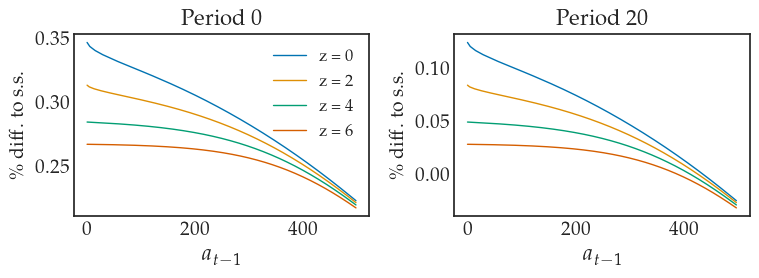

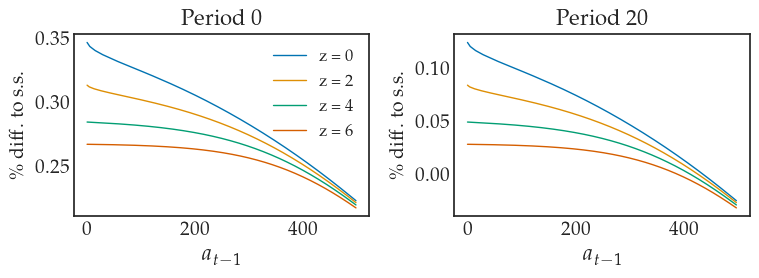

In [137]:
# plt.plot(model.path.p[0,0,0,:], label='p')
# plt.plot(model.path.p[1,0,0,:], label='p, t1')
# plt.plot(model.path.p[2,0,0,:], label='p, t2')
# plt.plot(model.path.p[3,0,0,:], label='p, t3')
# plt.plot(model.path.p[4,0,0,:], label='p, t4')
# plt.plot(model.path.p[0,0,0,:], label='p, t0')
# plt.plot(model.path.p[6,0,0,:], label='p, t6')


t = 0
type = 0
inc = 0


def show_p_hh(model, linewidth =1.0):

    ncols = 2
    nrows = 1
    T_max = 17


    fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
    # fig.suptitle(f'{model.name},  Individal Price indexes', fontsize=20)

    # period 0
    t = 0 
    ax = fig.add_subplot(nrows,ncols,1)    
    # For ever second income
    for inc in range(0, 7, 2):
        # For every period
        ax.plot((model.path.p[t,type,inc,:]-1)*100, label=f'z = {inc}', linewidth=linewidth)
    
    ax.set_title(f'Period {t}', fontsize=16)
    ax.set_xlabel(r' $a_{t-1}$', fontsize=16) # ****
    ax.set_ylabel('\% diff. to s.s.')
    ax.legend(loc='upper right', fontsize=12, frameon=False)
    # ax.legend()

    # period 7 
    t = 20
    ax = fig.add_subplot(nrows,ncols,2)

    # For ever second income
    for inc in range(0, 7, 2):
        # For every period
        ax.plot((model.path.p[t,type,inc,:]-1)*100, label=f'z = {inc}', linewidth=linewidth)
    ax.set_title(f'Period {t}', fontsize=16)
    ax.set_xlabel(r' $a_{t-1}$', fontsize=16) # ****
    ax.set_ylabel('\% diff. to s.s.')
    # ax.set_ylim(-0.5, 0.5)

    fig.tight_layout()
    return fig


show_p_hh(model)

# plt.plot(model.path.p[100,0,0,:], label='p, t7')
# plt.plot(model.path.PNT, label='PNT')
# plt.plot(model.path.PT, label='PT')


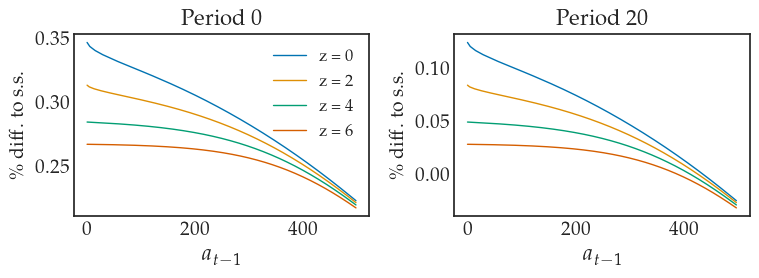

In [140]:
fig = figs.show_p_hh(model, linewidth=1.0)
fig.savefig(path + 'p_hh.png', dpi=300, bbox_inches='tight')

# New 

In [52]:

i_z = 0
a_ = 100
s = 0
t = 0

In [78]:




# base periode expenditure share on nontradables
ss.ct_exp_share = ss.ct/(ss.cnt + ss.ct) # prices are normalized to 1




# Step 1: Reshape arrays for broadcasting
ct_exp_share = ss.ct_exp_share[np.newaxis, :, :, :]         # (1, 2, 7, 500)
PT = path.PT[:, 0].reshape(-1, 1, 1, 1)                      # (500, 1, 1, 1)
PNT = path.PNT[:, 0].reshape(-1, 1, 1, 1)                    # (500, 1, 1, 1)

# Step 2: Compute components
term1 = (1 - (par.epsilon * ct_exp_share) / par.gamma) * PNT ** par.gamma
term2 = ((par.epsilon * ct_exp_share) / par.gamma) * PT ** par.gamma

# Step 3: Compute p_tilde and p
p_tilde = (term1 + term2) ** (1 / par.gamma)
p = p_tilde ** (par.gamma / par.epsilon) * PNT ** (1 - par.gamma / par.epsilon)



# print(ss.ct_exp_share.shape)

# print(path.PT.shape)

# p_tilde = ((1-(par.epsilon*ss.ct_exp_share)/par.gamma)*path.PNT**par.gamma + ((par.epsilon**ss.ct_exp_share)/par.gamma)*path.PT**par.gamma)**(1/par.gamma)
# p = p_tilde**(par.gamma/par.epsilon)*path.PNT**(1-par.gamma/par.epsilon)



# p_tilde = ((1-(par.epsilon*ss.ct_exp_share)/par.gamma)*path.PNT**par.gamma + ((par.epsilon**ss.ct_exp_share)/par.gamma)*path.PT**par.gamma)**(1/par.gamma)
# p = p_tilde**(par.gamma/par.epsilon)*path.PNT**(1-par.gamma/par.epsilon)


# 
# p_tilde = ((1-(par.epsilon*ss.ct_exp_share)/par.gamma)*path.PNT**par.gamma + ((par.epsilon**ss.ct_exp_share)/par.gamma)*path.PT**par.gamma)**(1/par.gamma)
# p = p_tilde**(par.gamma/par.epsilon)*path.PNT**(1-par.gamma/par.epsilon)


In [74]:
p.shape

(500, 2, 7, 500)

In [57]:
model.ss.cnt.shape

(2, 7, 500)

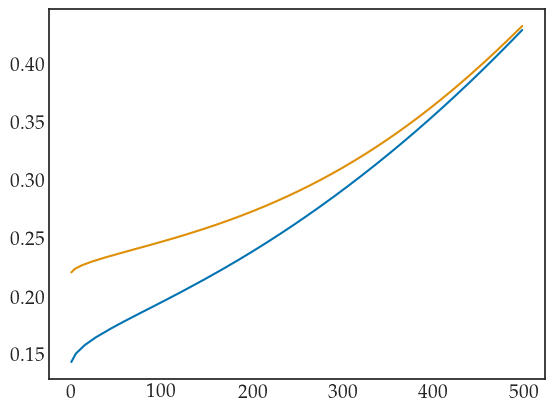

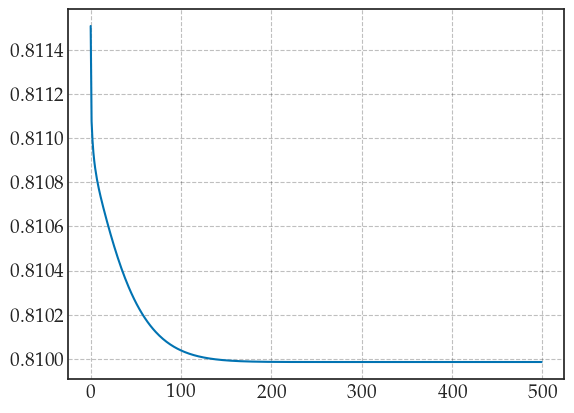

In [40]:




# Expenditure 
model_baseline.path.cnt_exp = model_baseline.path.cnt * model_baseline.path.PNT[:, None, None]
model_baseline.path.ct_exp = model_baseline.path.ct * model_baseline.path.PT[:, None, None]
model_baseline.path.ct_exp_share = model_baseline.path.ct_exp /(model_baseline.path.ct_exp + model_baseline.path.cnt_exp) 
model_baseline.path.p = # Gusse on this based on: 

# Individual prices
p_tilde = ((1-(model.par.epsilon*model.path.ct_exp_share)/model.par.gamma)*model.path.PNT[t]**model.par.gamma + ((model.par.epsilon**model.path.ct_exp_share)/model.par.gamma)*model.path.PT[t]**model.par.gamma)**(1/model.par.gamma)
p = p_tilde**(model.par.gamma/model.par.epsilon)*model.path.PNT[t]**(1-model.par.gamma/model.par.epsilon)


i_z = 0
a_ = 100
s = 0
t = 0

# np.shape(model_baseline.path.cnt_exp)

for i_z in range(model_baseline.model.par.n_z):

plt.plot(model_baseline.path.ct_exp_share[:,s,i_z,  a_])

# plt.plot(model_baseline.path.e[0,s,:,  0])

# plt.plot(model_baseline.path.ct_exp[1,s,i_z,  :])





In [ ]:
# Step 1: Compute expenditures
model_baseline.path.cnt_exp = model_baseline.path.cnt * model_baseline.path.PNT[:, None, None]
model_baseline.path.ct_exp = model_baseline.path.ct * model_baseline.path.PT[:, None, None]

# Step 2: Compute tradable expenditure share
model_baseline.path.ct_exp_share = model_baseline.path.ct_exp / (
    model_baseline.path.ct_exp + model_baseline.path.cnt_exp
)

# Step 3: Build aggregate price index
ct_share = model_baseline.path.ct_exp_share
PNT = model_baseline.path.PNT[:, None, None]
PT = model_baseline.path.PT[:, None, None]

epsilon = model_baseline.par.epsilon
gamma = model_baseline.par.gamma

term1 = (1 - (epsilon * ct_share) / gamma) * PNT**gamma
term2 = ((epsilon * ct_share) / gamma) * PT**gamma
p_tilde = (term1 + term2)**(1 / gamma)

model_baseline.path.p_ = p_tilde**(gamma / epsilon) * PNT**(1 - gamma / epsilon)


In [59]:
# Step 1: Compute expenditures
model_baseline.path.cnt_exp = model_baseline.path.cnt * model_baseline.path.PNT[:, None, None]
model_baseline.path.ct_exp = model_baseline.path.ct * model_baseline.path.PT[:, None, None]

# Step 2: Compute tradable expenditure share
model_baseline.path.ct_exp_share = model_baseline.path.ct_exp / (
    model_baseline.path.ct_exp + model_baseline.path.cnt_exp
)

# Step 3: Build aggregate price index
ct_share = model_baseline.path.ct_exp_share
PNT = model_baseline.path.PNT[:, None, None]
PT = model_baseline.path.PT[:, None, None]

epsilon = model_baseline.par.epsilon
gamma = model_baseline.par.gamma

term1 = (1 - (epsilon * ct_share) / gamma) * PNT**gamma
term2 = ((epsilon * ct_share) / gamma) * PT**gamma
p_tilde = (term1 + term2)**(1 / gamma)

model_baseline.path.p_ = p_tilde**(gamma / epsilon) * PNT**(1 - gamma / epsilon)


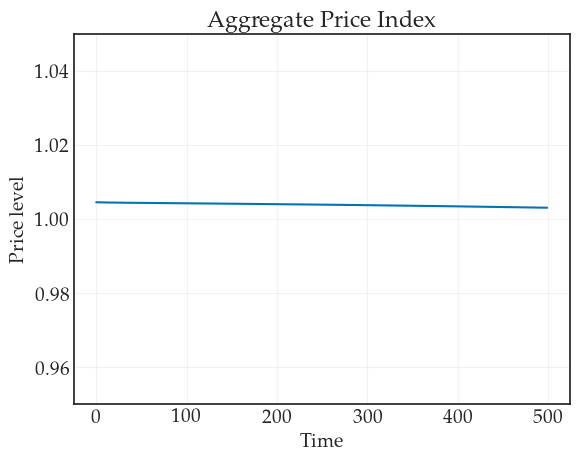

In [62]:
i_z = 0
a_ = 100
s = 0
t = 0

# np.shape(model_baseline.path.cnt_exp)

from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots()
# ax.plot(model_baseline.path.p[499, s, i_z, :])

ax.plot(model_baseline.path.p_[2, s, i_z, :])

# Make y-axis non-scientific
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))
ax.ticklabel_format(style='plain', axis='y')  # Ensure plain formatting
ax.set_ylim(0.95, 1.05)  # Set y-axis limits

ax.set_title("Aggregate Price Index")
ax.set_xlabel("Time")
ax.set_ylabel("Price level")
plt.grid(True)
plt.show()

In [17]:
np.shape(model_baseline.path.ct_exp)

(500, 2, 7, 500)

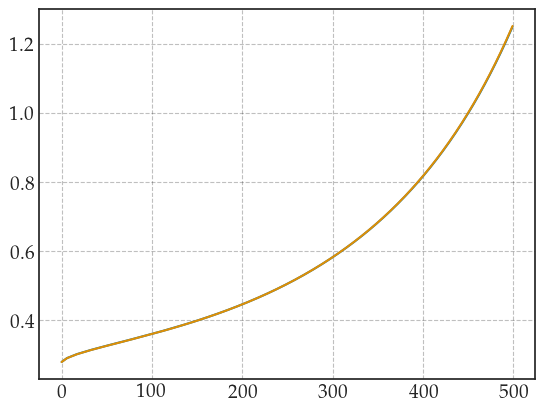

In [31]:
path.cnt_exp = path.cnt * path.PNT[:, None, None]
path.ct_exp = path.ct * path.PNT[:, None, None]
path.ct_exp_share = path.ct_exp / (path.ct_exp+ path.cnt_exp)

i_z = 0
a_ = 50
s = 0
t = 0

# np.shape(model_baseline.path.cnt_exp)

plt.plot(model_baseline.path.cnt_exp[3,s,i_z,  :])
plt.plot(model_baseline.path.ct_exp[1,s,i_z,  :])

In [4]:
model_homothetic = IHANKModelClass(name='Homothetic')
model_homothetic.par.epsilon = 0.0
model_homothetic.par.gamma = 0.18
model_homothetic.find_ss()
model_homothetic.compute_jacs()
model_homothetic.find_transition_path(shocks=shock_PE_s, do_end_check=False)

ZeroDivisionError: float division by zero

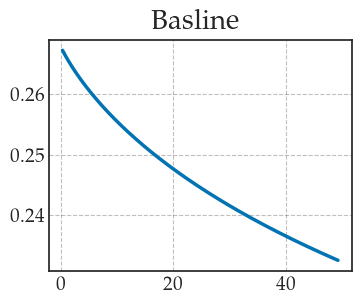

In [43]:
i_z = 6
a_ = 50
s = 1
t = 0

model = model_baseline
par = model.par

a = model.path.a[t,s,i_z,:]*model.path.PNT[t]
e = model.path.e[t,s,i_z,:]*model.path.PNT[t]

cnt = model.path.cnt[t,s,i_z,:]*model.path.PNT[t]
ct = model.path.ct[t,s,i_z,:]*model.path.PNT[t]

cnt_epx = model.path.cnt[t,s,i_z,:]*model.path.PNT[t]
ct_epx = model.path.ct[t,s,i_z,:]*model.path.PT[t]

ct_epx_share  = omega_T =  ct_epx/e


# Individual prices
p_tilde = ((1-(par.epsilon*omega_T)/par.gamma)*model.path.PNT[t]**par.gamma + ((par.epsilon*omega_T)/par.gamma)*model.path.PT[t]**par.gamma)**(1/par.gamma)
P = p_tilde**(par.gamma/par.epsilon)*model.path.PNT[t]**(1-par.gamma/par.epsilon)
inlfation = (P-1)*100


# p_tilde = ((1-(par.epsilon*par.omega_T)/par.gamma)*PNT**par.gamma + ((par.epsilon*par.omega_T)/par.gamma)*PT**par.gamma)**(1/par.gamma)



ncols = 1    
nrows = 1
T_max = 17
linewidth= 2.5 

fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
fig.suptitle(f'{model.name}', fontsize=20)

ax = fig.add_subplot(nrows,ncols,1) 
ax.plot(a,inlfation, label='Baseline', color=colors[0], linewidth=linewidth)





In [45]:
model.ss.test =  model.ss.e
np.shape(model.ss.test)

(2, 7, 500)

In [ ]:
figs.show_IRFs([model_baseline, model_homothetic], paths_, labels=[model_baseline.name, model_homothetic.name],  scale=False, maxcol=3)

In [ ]:
model_ppi_homo = IHANKModelClass(name='PPI Homothetic')
model_ppi_homo.par.float = True
model_ppi_homo.par.epsilon = 0.0
model_ppi_homo.par.gamma = 0.18
model_ppi_homo.par.mon_policy = 'taylor_ppi'
model_ppi_homo.find_ss()
model_ppi_homo.compute_jacs()
model_ppi_homo.find_transition_path(shocks=shock_PE_s, do_end_check=False)
figs.show_IRFs([model_ppi, model_ppi_homo], paths_, labels=[model_ppi.name, model_ppi_homo.name],  scale=False, maxcol=3)

In [ ]:
model_ppi = IHANKModelClass(name='PPI')
model_ppi.par.float = True
model_ppi.par.mon_policy = 'taylor_ppi'
model_ppi.find_ss()
model_ppi.compute_jacs()
model_ppi.find_transition_path(shocks=shock_PE_s, do_end_check=False)
figs.show_IRFs([model_baseline, model_ppi], paths_, labels=[model_baseline.name, model_ppi.name],  scale=False, maxcol=3)

In [ ]:
# IRF1 = ['YH', 'CT', 'CNT', 'W', 'P', 'w']
paths_2 = ['YH', 'CT', 'CNT', 'W', 'P', 'w', 'r_real',  'Q', 'p', 'inc', 'INC']

In [ ]:
fig = figs.show_IRFs([model_baseline, model_homothetic], paths_2, labels=[model_baseline.name, model_homothetic.name],  scale=False, maxcol=3)
fig.savefig('plots/IRF_standard.png', dpi=300, bbox_inches='tight')

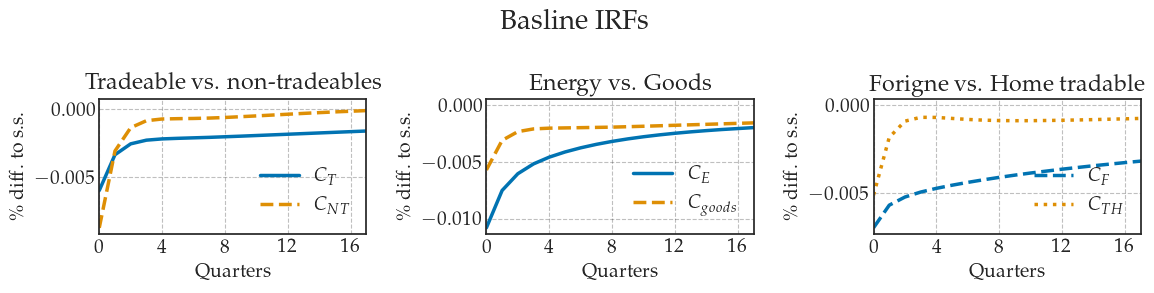

In [6]:

def show_c_IRFs(model):

    ncols = 3
    nrows = 1
    T_max = 17
    linewidth= 2.5 

    fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
    # Tradable and  non-tradable
    fig.suptitle(f'{model.name} IRFs', fontsize=20)
    
    ax = fig.add_subplot(nrows,ncols,1)    
    # ax.plot((model.path.p-model.ss.p),label='$p$', linewidth=linewidth)
    ax.plot(((model.path.CT-model.ss.CT)/model.ss.CT),label='$C_T$', linewidth=linewidth)
    ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT),ls='--',label='$C_{NT}$', linewidth=linewidth)
    # ax.plot((model.path.PNT-model.ss.PNT),ls=':',label='$P_{NT}$', linewidth=linewidth)
    ax.set_xlim([0,T_max])
    ax.set_ylabel('\% diff. to s.s.')
    ax.legend()
    ax.set_title('Tradeable vs. non-tradeables')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    # Energy and non energy tradable 
    ax = fig.add_subplot(nrows,ncols,2)    
    ax.plot(((model.path.CE-model.ss.CE)/model.ss.CE),label='$C_E$', linewidth=linewidth)
    ax.plot(((model.path.CTHF-model.ss.CTHF)/model.ss.CTHF),ls='--',label='$C_{goods}$', linewidth=linewidth)
    # ax.plot((model.path.PE-model.ss.PE),ls=':',label='$P_{Energy}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    ax.legend()
    ax.set_title('Energy vs. Goods')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    # Forign and domestic tradable 
    ax = fig.add_subplot(nrows,ncols,3)    
    # ax.plot((model.path.PTHF-model.ss.PTHF),label='$P_{goods}$', linewidth=linewidth)
    ax.plot(((model.path.CTF-model.ss.CTF)/model.ss.CTF),ls='--',label='$C_F$', linewidth=linewidth)
    ax.plot(((model.path.CTH-model.ss.CTH)/model.ss.CTH),ls=':',label='$C_{TH}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    ax.legend(loc='lower right')
    ax.set_title('Forigne vs. Home tradable')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    fig.tight_layout()

    return fig
fig = show_c_IRFs(model_baseline)

In [14]:
model_baseline.name = 'Basline Model'

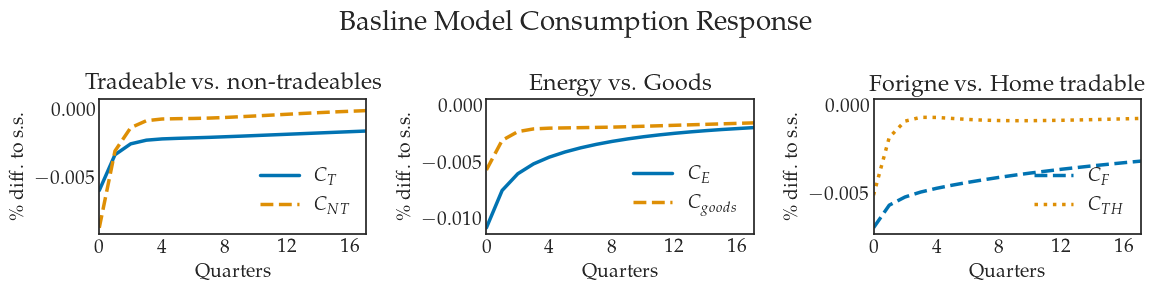

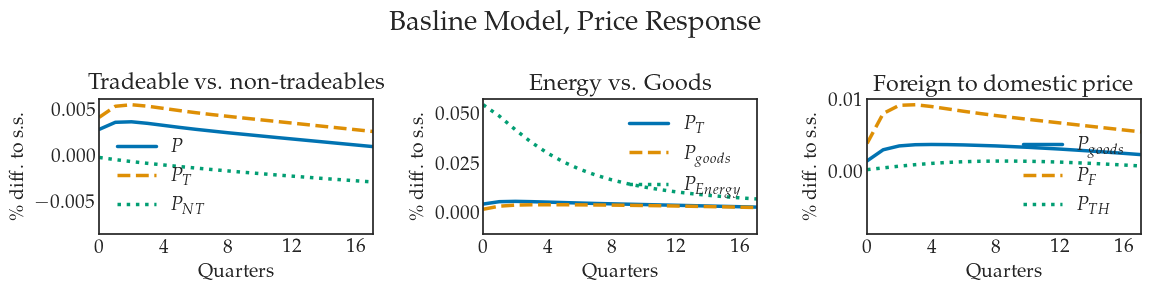

In [15]:
fig = figs.show_c_IRFs(model_baseline)
fig = figs.show_price_IRFs(model_baseline)

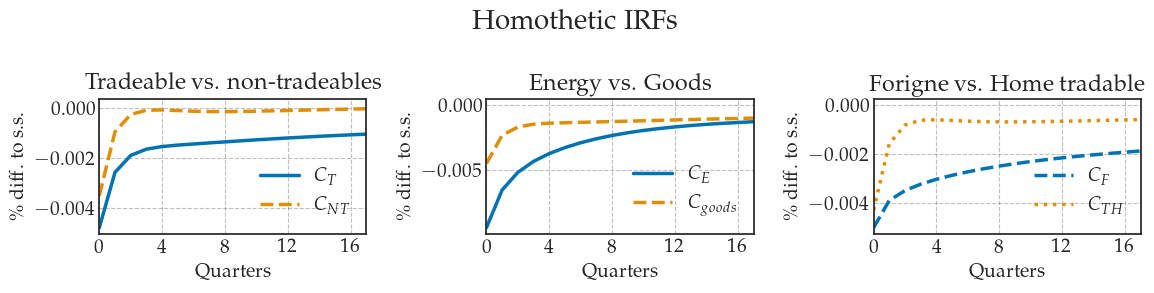

In [7]:
fig = show_c_IRFs(model_homothetic)

In [ ]:
model_fixed = IHANKModelClass(name='Fixed')
model_fixed.par.float = False
model_fixed.find_ss()
model_fixed.compute_jacs()
model_fixed.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
figs.show_IRFs([model_baseline, model_fixed], paths_2, labels=[model_baseline.name, model_fixed.name],  scale=False, maxcol=3)

In [ ]:
fig = show_price_IRFs(model_homothetic)

In [ ]:
fig = figs.show_price_IRFs(model_baseline)

In [ ]:
paths_NX = ['Q', 'CTH_s', 'CT' ]
fig = figs.show_IRFs([model_baseline, model_homothetic], paths_NX, labels=[model_baseline.name, model_homothetic.name],  scale=False, maxcol=3)

In [ ]:
model_high_eta = IHANKModelClass(name='High eta')
model_high_eta.par.eta_s = 2.0
model_high_eta.par.etaF = 2.0
model_high_eta.par.etaE = 2.0
model_high_eta.par.gamma = 0.05
model_high_eta.find_ss()
model_high_eta.compute_jacs()
model_high_eta.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
figs.show_IRFs([model_baseline, model_high_eta], paths_2, labels=[model_baseline.name, model_high_eta.name],  scale=False, maxcol=3)

In [ ]:
model_low_nu = IHANKModelClass(name='Low nu')
model_low_nu.par.nu = 0.3
model_low_nu.find_ss()
model_low_nu.compute_jacs()
model_low_nu.find_transition_path(shocks=shock_PE_s, do_end_check=False)
print(model_low_nu.par.eta_T_RA)

In [ ]:
model_CES = IHANKModelClass(name='CES')
model_CES.par.gamma = model_CES.par.epsilon
model_CES.find_ss()
model_CES.compute_jacs()
model_CES.find_transition_path(shocks=shock_PE_s, do_end_check=False)
print(model_CES.par.eta_T_RA)

In [ ]:
fig = figs.show_IRFs([model_baseline, model_CES], paths_2, labels=[model_baseline.name, model_CES.name],  scale=False, maxcol=3)

In [ ]:
model_easy = IHANKModelClass(name='Easy')
model_easy.par.phi = 1.2
model_easy.find_ss()
model_easy.compute_jacs()
model_easy.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
model_tight = IHANKModelClass(name='Tight')
model_tight.par.phi = 1.7
model_tight.find_ss()
model_tight.compute_jacs()
model_tight.find_transition_path(shocks=shock_PE_s, do_end_check=False)


In [ ]:
figs.show_IRFs([model_baseline, model_easy, model_tight], paths_, labels=[model_baseline.name, model_easy.name, model_tight.name],  scale=False, maxcol=3)

In [ ]:
i_z = 3
models_list = [model_baseline , model_homothetic]

line_styles = ['-', '--', '-.', ':']
colors = ['r', 'b', 'g']

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131)

# for model in models_list:
for i, model in enumerate(models_list):

    ct_share = model.ss.ct[0,i_z,:]/ (model.ss.ct[0,i_z,:]+ model.ss.cnt[0,i_z,:])
    e = model.ss.e[0,i_z,:]
    a = model.par.a_grid[:]
    ax1.plot(a,ct_share, label=model.name, linestyle= line_styles[i], color=colors[i])

ax1.set_title('Consumption share of total consumption')


ax2 = fig.add_subplot(132)
for i, model in enumerate(models_list):
    e = model.ss.e[0,i_z,:]
    a = model.par.a_grid[:]
    savings = model.ss.a[0,i_z,:]
    ax2.plot(a,e, label=model.name, linestyle= line_styles[i], color=colors[i])
    # ax2.plot(a,savings, label=model.name, linestyle= line_styles[i], color=colors[i])

ax2.set_title('Expenditure')


# Expenditure share of total expenditure
ax3 = fig.add_subplot(133)
for i, model in enumerate(models_list):
    e = model.ss.e[0,i_z,:]
    ct = model.ss.ct[0,i_z,:]
    cnt = model.ss.cnt[0,i_z,:]
    ax3.plot(a,ct, label=f'ct, {model.name}', linestyle= line_styles[i], color=colors[i])
    ax3.plot(a,cnt, label=f'cnt, {model.name}', linestyle= line_styles[i], color=colors[i])

ax3.set_title('Consumption and non-tradable consumption')
# Legend below the plot
ax3.legend(loc='lower right')


fig.tight_layout()

# ct_share = model.ss.ct[0,i_z,:]/ (model.ss.ct[0,i_z,:]+ model.ss.cnt[0,i_z,:])
# a = model.par.a_grid[:]
# ax.plot(a,ct_share, label=i_z, color=colors[i_z])

# ax.plot(e_, ct_share, label='ct_share', color=colors[3])


In [ ]:

# List of models
models_list = [model_baseline, model_homothetic_only_consumption , model_homothetic, model_e_]
model_names = []
for i in models_list:
    model_names.append(i.name)




# List of variables
varlist = ['CT', 'CNT', 'E_hh', 'YTH', 'YNT', 'inc_TH', 'inc_NT', 'NTH', 'NNT', 'div_NT', 'div_TH', 'A_hh','CE', 'CTHF', 'CTH', 'CTH_s' ]
par_list = ['nu', 'epsilon', 'gamma', 'eta_T_RA', 'omega_T']

model.par.__dict__['nu']


# Create a dictionary to store values
data = {}

# Loop through each model and extract steady-state values
for model, name in zip(models_list, model_names):
    try:
        data[name] = [getattr(model.ss, var) for var in varlist]
    except:
        print(f"Could not extract")
# Create DataFrame
df = pd.DataFrame(data, index=varlist)

# rounding to 2 decimals
df = df.round(2)


# Add the percentage change from the baseline
df_pct = df.pct_change(axis=1) * 100

df_pct

In [ ]:


# List of models
models_list = [model_baseline, model_homothetic]
model_names = [model.name for model in models_list]

# List of variables and parameters
varlist = ['CT', 'CNT', 'E_hh', 'YTH', 'YNT', 'inc_TH', 'inc_NT', 'NTH', 'NNT', 'div_NT', 'div_TH', 'A_hh', 'CE', 'CTHF', 'CTH', 'CTH_s']
par_list = [ 'nu', 'epsilon', 'gamma', 'eta_T_RA', 'omega_T'] #  'pref'

# Create a dictionary to store values
data = {}

# Extract steady-state values
for model, name in zip(models_list, model_names):
    try:
        data[name] = [getattr(model.ss, var) for var in varlist]
    except Exception as e:
        print(f"Could not extract data for {name}: {e}")

# Create DataFrame for steady-state variables and round
df = pd.DataFrame(data, index=varlist).round(2)

# Compute percentage change from the baseline
df_pct = df.pct_change(axis=1) * 100

# Extract parameters for each model
params_data = {name: [getattr(model.par, par) for par in par_list] for model, name in zip(models_list, model_names)}

# Create DataFrame for parameters and round
df_params = pd.DataFrame(params_data, index=par_list).round(2)

# Concatenate parameters above the percentage change DataFrame
df_final = pd.concat([df_params, df_pct])

# Display the full DataFrame without truncation
# Rounding all values to 2 decimals
df_final = df_final.round(2)

print(df_final)


In [ ]:
# compare_ss

# make a table with the results


model = model_baseline
var = 'PE_s'


PE_s = model_baseline.ss.__dict__[var]
print(PE_s)

model_list = [model_baseline, model_homothetic]
varlist = ['PE_s', 'PE', 'p', 'inc_NT', 'inc_TH', 'ra', 'i', 'Q']

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)


for i_z in range(model_baseline.par.Nz):
    ct_share = model_baseline.ss.ct[0,i_z,:]/ (model_baseline.ss.ct[0,i_z,:]+ model_baseline.ss.cnt[0,i_z,:])
    a = model_baseline.par.a_grid[:]
    ax.plot(a,ct_share, label=i_z, color=colors[i_z])

# ax.plot(e_, ct_share, label='ct_share', color=colors[3])
ax.legend()

In [ ]:
model_homothetic_only_consumption.compare_IRFs(models=[model_baseline, model_homothetic, model_homothetic_only_consumption], labels=['Basline', 'Homothetic', 'Homothetic only consumption'], varnames=model.varlist,  T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
YTH = model_baseline.path.YTH
YNT = model_baseline.path.YNT
CNT = model_baseline.path.CNT
CTH = model_baseline.path.CTH 
CTH_s = model_baseline.path.CTH_s

# Differnce form ss 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(YTH - model_baseline.ss.YTH, label='YTH')
ax.plot(YNT - model_baseline.ss.YNT, label='YNT')
ax.plot(CNT - model_baseline.ss.CNT, label='CNT')
ax.plot(CTH - model_baseline.ss.CTH, label='CTH')
ax.plot(CTH_s - model_baseline.ss.CTH_s, label='CTH_s')
ax.legend()

In [ ]:
model_baseline.show_IRFs(model.varlist, do_shocks=False, do_targets=False, T_max=50, ncols=3, lvl_value=lvl_path)

In [ ]:
fig = figs.plot_PE_s(model_baseline)
if save_figs:
    fig.savefig(path + 'PE_s.png', dpi=300)


In [ ]:
fig = figs.plot_jac_p(model_baseline)
if save_figs:
    fig.savefig(path + 'jac_p.png', dpi=300)

In [ ]:

# Expenditure shares 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)

model = model_PIGL_cubdouglaseta


C_list = ['CT', 'CNT']
P_list = ['PT', 'PNT']
# prices = ['P', 'PT', 'PNT', 'PTHF', 'PTH', 'PF'  ]

for i in range(len(C_list)):
    # P_ = P_list[i]
    # P__ = model.path.__dict__[P_]
    dC = (model.path.__dict__[C_list[i]]/model.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = C_list[i])

    dC = (model_CB.path.__dict__[C_list[i]]/model_CB.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = f'CB {C_list[i]}')


# for C in C_list:
#     dC = (model_baseline.path.__dict__[C]/model_baseline.ss.__dict__[C] - 1)*100
#     ax.plot(dC[:50],  label = C)


ax.set_title('Tradable and non-tradable')
ax.legend()

ax = fig.add_subplot(122)

C_list = ['CTHF', 'CE']
P_list = ['PTHF', 'PE']

for i in range(len(C_list)):
    # P_ = P_list[i]
    # P__ = model.path.__dict__[P_]
    # print(C_list[i])
    dC = (model.path.__dict__[C_list[i]]/model.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = C_list[i])

    dC = (model_CB.path.__dict__[C_list[i]]/model_CB.ss.__dict__[C_list[i]] - 1)*100
    ax.plot(dC[:50],  label = f'CB {C_list[i]}')

ax.set_title('Energy and non-energy')
ax.legend()

In [ ]:


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

P = 'P'

prices = ['P', 'PT', 'PNT', 'PTHF', 'PTH', 'PF' , 'PE' ]

for P in prices:
    P_ = model_baseline.path.__dict__[P]
    ax.plot(P_[:50],  label = P)
ax.set_title('Price levels')
ax.legend()
plt.show()


In [ ]:
def share_T(par,e, PT=1, PNT=1):
    CT = (e/PT)*(par.nu*(PNT/e)**par.epsilon*(PT/PNT)**par.gamma)
    CNT = (e/PNT)*(1-par.nu*(PNT/e)**par.epsilon*(PT/PNT)**par.gamma)  
    return CT/(CT+CNT) 

In [ ]:
# Marginal propensity to consume/spend
# e = model_baseline.ss.e
par = model_baseline.par


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

i_fix = 0
Nz = 0

for i_z in [1]: #[par.Nz//2-1,par.Nz//2,par.Nz//2+1]:
    
    
    e = model_baseline.ss.e[i_fix,i_z, :]


    t_share = share_T(par,e[1:], PT=model_baseline.ss.PT, PNT=model_baseline.ss.PNT)

    e = model_baseline.ss.e[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    ax.scatter(t_share, MPC, label=f'Marginal propensity to spend')


    e = model_baseline.ss.ct[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    ax.scatter(t_share, MPC, label=f'Marginal propensity T')


    e = model_baseline.ss.cnt[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    ax.scatter(t_share, MPC, label=f'Marginal propensity NT')




#     ax.plot(par.a_grid[:-1],MPC,label=f'z = {par.z_grid[i_z]:.2f}')


ax.set_xlabel('$Tradable share$')

ax.legend(frameon=True);

fig.suptitle('MPC from policy function')
fig.tight_layout(pad=0.5)

# fig.savefig('figs/MPC_policy.pdf')

In [ ]:
# Marginal propensity to consume/spend
e = model_baseline.ss.e
par = model_baseline.par

# MPC = (e[i_fix,Nz, 1:]-e[i_fix, Nz,:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# ax.plot(e[1:], MPC, label='MPC')
# ax.plot(e[1:], t_share, label='Tradable share')

i_fix = 0
Nz = 0

# a_grid initial assets in


for i_z in [1]: #[par.Nz//2-1,par.Nz//2,par.Nz//2+1]:
    e = model_baseline.ss.e[i_fix,i_z, :]
    MPC = (e[1:]-e[:-1])/((1+model.ss.ra)*(par.a_grid[1:]-par.a_grid[:-1]))
    t_share = share_T(par,e[1:], PT=model_baseline.ss.PT, PNT=model_baseline.ss.PNT)
    ax.plot(t_share, MPC, label=f'z = {par.z_grid[i_z]:.2f}')

    


#     ax.plot(par.a_grid[:-1],MPC,label=f'z = {par.z_grid[i_z]:.2f}')


ax.set_xlabel('$Tradable share$')

ax.legend(frameon=True);

fig.suptitle('MPC from policy function')
fig.tight_layout(pad=0.5)

# fig.savefig('figs/MPC_policy.pdf')

In [ ]:
model_high_epsilon = model.copy(name='High epsilon')
model_high_epsilon.par.epsilon_ = model.par.epsilon_ + 0.1
model_high_epsilon.find_ss(do_print=False)
model_high_epsilon.compute_jacs()

In [ ]:
model_high_gamma = model.copy(name='Gamma 0')
model_high_gamma.par.gamma_ = 0.0
model_high_gamma.find_ss(do_print=False)
model_high_gamma.compute_jacs()


In [ ]:
fig = figs.plot_jac_p(model_baseline)


In [ ]:
fig = figs.plot_jac_p(model_high_epsilon)

In [ ]:
fig = figs.plot_jac_p(model_high_gamma)

In [ ]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure
# run_test = False


if run_test:
    a_ = model.ss.a[0,3,:]*model.ss.PNT
    e_ = model.ss.e[0,3,:]*model.ss.PNT
    ect_ = model.ss.ct[0,3,:]*model.ss.PT
    ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
    share_ = ect_/(ecnt_+ect_)
    

    plt.figure()
    plt.plot(e_,share_)
    plt.xlabel('Total expenditure')
    plt.ylabel('Expenditure share tradable goods')
    plt.title('Non-homothetic expenditure shares')
    # model.test_hh_path()
    # model.test_path()
    # model.test_jacs()




In [ ]:
model_fixed = model.copy(name='Fixed exchange rate')
# model_fixed.par.nu = 2.0
model_fixed.par.float = False
model_fixed.find_ss(do_print=False)
model_fixed.compute_jacs()
model_fixed.find_transition_path(shocks=shock_PE_s, do_end_check=False)
# model_fixed.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
models_list = [ model_baseline, model_fixed]
labels = []
for i in models_list:
    labels.append(i.name)
print(labels)
model_baseline.compare_IRFs(models=models_list, labels=labels, varnames=model.varlist,  T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=True, do_targets=False)

In [ ]:
model_baseline.compare_IRFs(models=models_list, labels=labels, varnames=model.varlist,  T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=True, do_targets=False)